<a href="https://colab.research.google.com/github/vsolodkyi/NeuralNetworks_SkillBox/blob/main/model_5/%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D1%8B%D1%85_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Использование готовых моделей

Мы рассмотрели на лекции, что научное сообщество придумало и протестировало много моделей, которые до сих пор не перестают улучшать результаты. 

Движение open-source и эффективные, удобные фреймворки дали невероятный толчок развитию machine learning и deep learning потому что сократило путь от научной статьи до возможности применить описанные методы до нескольких минут -- ведь стало распростаненной практикой выкладывать архитектуры и веса к ним в открытый доступ. 

Как же получить доступ к таким полезным ресурсам? Новые статьи часто дают ссылку на github где подробно написано как можно использовать и обучать модели. 

А для самых распростаненных архитектур есть реализации прямо внутри библиотек. В этом уроке мы познакомимся с тем, как использовать готовые модели в Keras для классификации. Т.е. как производить **инференс**.



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Для того чтобы получить доступ к реализованным моделям, достаточно обратится к tf.keras.applications. 

Например, попробуем определить знакому нам VGG19

In [ ]:
vgg19 = tf.keras.applications.VGG19()

574726144/574710816 [==============================] - 6s 0us/step


In [ ]:
# посмотрим на саммари
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# но модель инициализирована случайными весами. поэтому делать с помощью нее предсказания -- бесполезно
# с помощью weights='imagenet' -- инициализируем ее параметрами, которые получились при ее обучении на imagenet
# (они скачиваются из интернета)
vgg19 = tf.keras.applications.VGG19(weights='imagenet')

In [ ]:
# скачаем несколько картинок
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg -O panda.jpg
!wget https://5.imimg.com/data5/CB/DA/MY-24779561/cricket-tennis-balls-500x500.jpg -O ball.jpg
!wget https://image.shutterstock.com/image-photo/luxury-house-beautiful-landscaping-on-260nw-448870624.jpg -O house.jpg

--2022-02-03 15:32:35--  https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg [following]
--2022-02-03 15:32:36--  https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K  --.-KB/s    in 0.02s   

2022-02-03 15:32:36 (4.54 MB/s) - ‘panda.jpg’ saved [116068/116068]

--2022-02-03 15:32:37--  https://5.imimg.com/data5/CB/DA

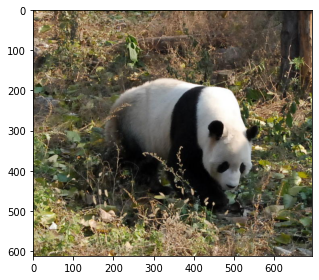

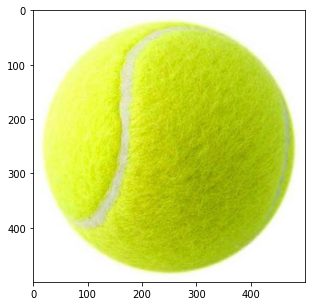

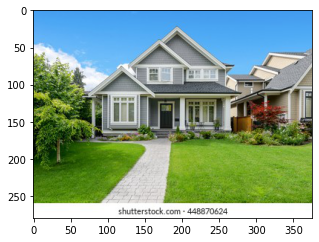

In [ ]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
house = read_and_show("house.jpg")

In [ ]:
# попробуем применить сеть к нашему изображению?
vgg19.predict(panda.astype(np.float32)[None, ...])

ValueError: ignored

In [ ]:
# оказывается, модель ожидает определенный размер, учтем это

def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]


prepare_image(panda, (224, 224)).numpy().shape

(1, 224, 224, 3)

In [ ]:
input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)

In [ ]:
# что это?)
prediction

array([[1.26811550e-09, 3.44695550e-10, 3.22687264e-08, 5.80743142e-09,
        1.59081068e-08, 3.61620813e-08, 3.78847972e-07, 1.35859124e-09,
        2.15428475e-08, 6.56979249e-10, 1.51249263e-10, 1.48422952e-09,
        3.74347497e-11, 1.09397087e-08, 1.57303215e-09, 8.33320427e-11,
        1.26602374e-11, 1.62169176e-08, 5.11573539e-08, 1.30278082e-07,
        1.11702390e-10, 5.42669937e-11, 1.20430818e-10, 4.86385510e-09,
        5.09609438e-11, 1.74634127e-11, 6.35704857e-12, 1.71719485e-12,
        7.51462226e-11, 9.12550480e-09, 6.41466004e-12, 6.25386479e-11,
        1.00892333e-11, 4.55178917e-09, 1.04404443e-10, 5.48166859e-11,
        5.16543086e-10, 4.62332360e-11, 1.09567936e-11, 1.68759863e-12,
        2.47214402e-11, 1.18264545e-12, 2.68372970e-13, 3.49642190e-12,
        1.37551645e-12, 2.89462759e-10, 6.78023818e-11, 4.10795920e-12,
        9.53750301e-10, 3.84942044e-11, 4.19419638e-11, 8.46436166e-09,
        7.96191862e-11, 2.28020589e-11, 7.51535292e-11, 6.718193

In [ ]:
prediction.sum(), prediction.shape # предсказали вероятности 1000 классов. а как расшифровать?

(1.0000001, (1, 1000))

In [ ]:
from tensorflow.keras.applications.vgg19 import decode_predictions

input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

49152/35363 [=========================================] - 0s 0us/step


[[('n02510455', 'giant_panda', 0.96405154),
  ('n02395406', 'hog', 0.013967678),
  ('n02134084', 'ice_bear', 0.007813153),
  ('n02120079', 'Arctic_fox', 0.007052075),
  ('n02108915', 'French_bulldog', 0.0021671755)]]

На самом деле в примере выше нам повезло. Мы забыли очень важную часть -- препроцессинг картинки. Для каждой сети он свой и находитя рядом с ней:

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input
# добавим этап препроцессинга и получим еще более правильный ответ
input_image = prepare_image(panda, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

[[('n02510455', 'giant_panda', 0.99942386),
  ('n02445715', 'skunk', 0.00029818906),
  ('n02120079', 'Arctic_fox', 0.00017282202),
  ('n02395406', 'hog', 6.697354e-05),
  ('n02114548', 'white_wolf', 8.604859e-06)]]

In [ ]:
# сделаем из этого удобную функцию

def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. Min: {input_image.numpy().min()}.")
    
    prediction = model.predict(input_image)
    return decode_predictions(prediction)

In [ ]:
# и применим на мячике
make_prediction(vgg19, preprocess_input, decode_predictions, ball)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -103.93900299072266.


[[('n04409515', 'tennis_ball', 0.999806),
  ('n04039381', 'racket', 0.000120159566),
  ('n03445777', 'golf_ball', 3.160186e-05),
  ('n03134739', 'croquet_ball', 8.094177e-06),
  ('n07749582', 'lemon', 7.5195044e-06)]]

А теперь попробуем другую сеть -- MobileNetV2

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilenet = MobileNetV2(weights="imagenet")

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
make_prediction(mobilenet, preprocess_input, decode_predictions, panda)
# почему неправильно ?? 

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.


[[('n09229709', 'bubble', 0.058035918),
  ('n04418357', 'theater_curtain', 0.050058268),
  ('n04442312', 'toaster', 0.034434628),
  ('n03388043', 'fountain', 0.026835293),
  ('n03733281', 'maze', 0.026332092)]]

**Мы применили препроцессинг одной сети к другой. Это и привело к неправильным предсказаниям.** Это очень важно. Всегда пытайтесь понять что именно на вход принимает та или иная сеть. Каким-то достаточно просто нормализации на 0-1, другие ожидают значения от -1 до 1. Будьте внимательны! И используйте правильные функции

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions as decode_predictions_mobilenet

make_prediction(mobilenet, preprocess_input_mobilenet, decode_predictions_mobilenet, panda)

Image shape: (1, 224, 224, 3). Max: 1.0. Min: -1.0.


[[('n02510455', 'giant_panda', 0.91129684),
  ('n02133161', 'American_black_bear', 0.0016244855),
  ('n04254680', 'soccer_ball', 0.0012084891),
  ('n02134084', 'ice_bear', 0.0011731127),
  ('n02412080', 'ram', 0.0011307894)]]

# Итог

Мы научились пользоваться готовыми моделями в Keras. А также на своем опыте убедились как важно правильно преобразовывать изображения перед инференсом. В практическом задании вы закрепите полученные знания.

# Практическое задание 

Выполните предсказания с помощью двух любых сетей из tf.keras.applications для любых картинок (скачать можно аналогично или использовать загруженные). Также вы можете раскрыть боковое меню справа. Перейти во вкладку Files и воспользоваться Upload.

In [ ]:
# < YOUR CODE HERE >
# ниже должен идти ваш собственный пример инференса двух любых сетей на разных картинках.

new = read_and_show("800px-Ara_macao_-_two_at_Lowry_Park_Zoo.jpg")

input_image = new
input_image = prepare_image(new, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

FileNotFoundError: ignored

In [ ]:
!wget https://phototass3.cdnvideo.ru/width/1200_4ce85301/tass/m2/uploads/i/20190830/5150283.jpg -O panda.jpg
!wget https://i.pinimg.com/originals/61/93/ed/6193ed6a82751ad6d728b1869c7a665e.jpg -O ball.jpg
!wget https://domikdomovenka.ru/files/products/popugay_ara.600x600.jpg -O ara.jpg

--2020-07-10 10:45:54--  https://phototass3.cdnvideo.ru/width/1200_4ce85301/tass/m2/uploads/i/20190830/5150283.jpg
Resolving phototass3.cdnvideo.ru (phototass3.cdnvideo.ru)... 91.231.239.79
Connecting to phototass3.cdnvideo.ru (phototass3.cdnvideo.ru)|91.231.239.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg               [ <=>                ]  86.84K   576KB/s    in 0.2s    

2020-07-10 10:45:54 (576 KB/s) - ‘panda.jpg’ saved [88926]

--2020-07-10 10:45:55--  https://i.pinimg.com/originals/61/93/ed/6193ed6a82751ad6d728b1869c7a665e.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.122.44.225, 2a04:4e42:53::84
Connecting to i.pinimg.com (i.pinimg.com)|104.122.44.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195345 (191K) [image/jpeg]
Saving to: ‘ball.jpg’

ball.jpg            100%[===================>] 190.77K  --.-KB/s    in 0.06s   

2020-07-10 10:45:56 (3.15 MB/s) 

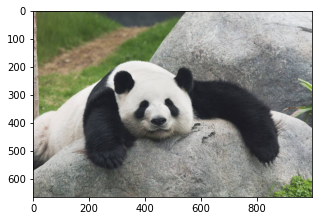

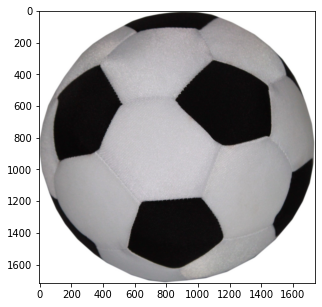

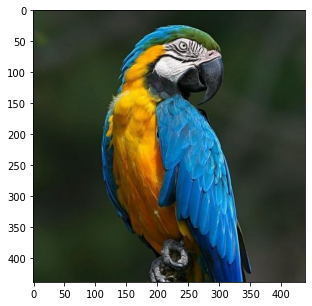

In [ ]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
ara = read_and_show("ara.jpg")

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights="imagenet")
make_prediction(resnet, preprocess_input_resnet, decode_predictions_resnet, ara)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.


[[('n01818515', 'macaw', 0.9991062),
  ('n01828970', 'bee_eater', 0.00035273604),
  ('n01820546', 'lorikeet', 0.00024979215),
  ('n01819313', 'sulphur-crested_cockatoo', 7.943789e-05),
  ('n01843383', 'toucan', 5.0186685e-05)]]

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.xception import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.xception import Xception

xception = Xception(weights="imagenet")
make_prediction(xception, preprocess_input_resnet, decode_predictions_resnet, panda)

Image shape: (1, 299, 299, 3). Max: 0.9924454689025879. Min: -0.9788087606430054.


[[('n02510455', 'giant_panda', 0.82447827),
  ('n02509815', 'lesser_panda', 0.0036558723),
  ('n02133161', 'American_black_bear', 0.0033556602),
  ('n02132136', 'brown_bear', 0.0025437274),
  ('n02447366', 'badger', 0.0018090393)]]

In [ ]:
def make_prediction(model, preprocess_input, decode_predictions, image):
  img_size = (model.input_shape[1], model.input_shape[2])
  input_image = prepare_image(image, (img_size))
  input_image = preprocess_input_mobilenet(input_image)

  prediction = model.predict(input_image)
  return decode_predictions_mobilenet(prediction)

SyntaxError: ignored

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet
from tensorflow.keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights="imagenet")
make_prediction(resnet, preprocess_input_resnet, decode_predictions_resnet, ara)